In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Logistic Regression (Binary classification)

Applying a sigmoid function to the linear regression, resulting in the following equation:
\begin{equation}
y = \frac{1}{1 + e^{-(mx+b)}}
\end{equation}
The maximum likelihood is the criteria used to determine the best fit equation.

__Example description__: Predict whether a person bought insurance or not based on age

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression


df = pd.read_csv("insurance_data.csv")

plt.scatter(df["age"],df["bought_insurance"],marker='+',color = "black")

x = np.array(df["age"])
y = np.array(df["bought_insurance"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# Calculating logistic model
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
log = logistic.score(x_test,y_test)
print ('Logistic Accuracy: ', log)

#Plotting logistic model
m = logistic.coef_[0][0]
b = logistic.intercept_[0]

limiar = -b/m

x = np.arange(0,63)
y = 1/(1 + (math.e)**(-m*x - b))

plt.plot(x,y)
plt.axvline(x=limiar, c ='red');


ValueError: Expected 2D array, got 1D array instead:
array=[19. 28. 40. 25. 45. 29. 50. 46. 58. 61. 55. 21. 18. 56. 49. 54. 52. 27.
 26. 62. 47. 60. 25. 22.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Logistic Regression (Multiclass classification)

A Logistic Regression in a Multiclass classification problem with N numbers of classes is broken down to N pairs of binary classification whith one of the classes representing the binary 1 and all other classes representing the binary 0. This is know as "one vs the rest" multiclass classification. At the end, the class that has reached the highest binary probability is the one who will be predicted.

\begin{equation}
y_0 = \frac{1}{1 + e^{a_0X_0 + a_1X_1 + a_nX_n + b_0}}
\end{equation}

\begin{equation}
y_1 = \frac{1}{1 + e^{b_0X_0 + b_1X_1 + b_nX_n + b_1}}
\end{equation}

\begin{equation}
y_n = \frac{1}{1 + e^{c_0X_0 + c_1X_1 + c_nX_n + b_n}}
\end{equation}

Predicted value = Max {$y_0,y_1, ..., y_n$}

__Example description__: Predict the type of flower based on the size of its leaves

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [21]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df["Target"] = iris.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


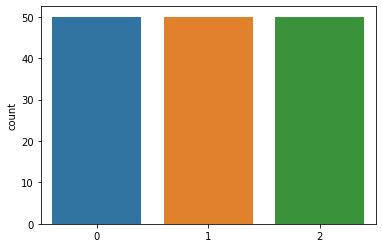

In [22]:
import seaborn as sns
sns.countplot(iris.target,label="Count")
plt.show()

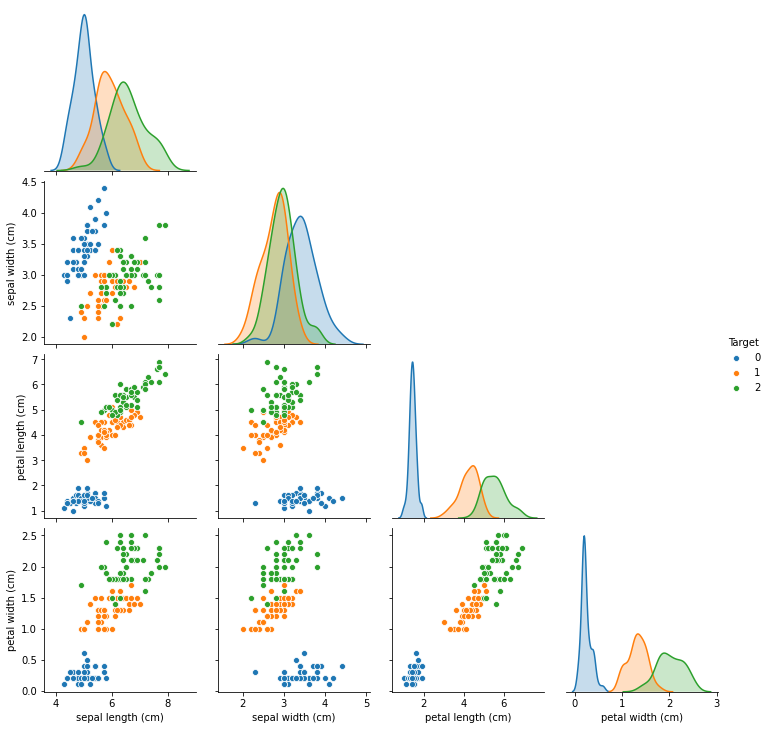

In [23]:
sns.pairplot(df, hue = 'Target', corner = True)

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9473684210526315

In [25]:
model.coef_  

array([[-0.47126481,  0.80159799, -2.37722516, -0.98214847],
       [ 0.26712351, -0.15936382, -0.21281347, -0.69063615],
       [ 0.2041413 , -0.64223417,  2.59003863,  1.67278462]])

In [26]:
model.intercept_

array([ 10.05716147,   2.85241854, -12.90958001])